# Natural Biodiversity Data Science Project

## Scope
The following data science project aims to provide meaningful information about the state of the species present today in national parks. Ansewring the following questions, we aim to provide a strong foundation to preserve and protect endangered species today, while also providing a snapshot of the current state of national parks.
### Questions
1. What endagered species are present today in natural parks?
2. Which species are the most endangered today?
3. What are the most common and least common species found in national parks today?

## Analysis
### Initial Exploratory Analysis

#### Import the libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import chi2_contingency




#### Load the data

In [58]:
# Load the data
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

#### Explore the data
##### Inspecting the head of the data frames

In [59]:
# Initial exploratory analysis
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [60]:
observations.tail()

,scientific_name,park_name,observations
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164


#### Inspecting the shape of the data frames

In [61]:
species.shape

(5824, 4)

In [62]:
observations.shape

(23296, 3)

##### Summarizing the data with a descriptive analysis

In [63]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [64]:
observations.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [65]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [66]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


##### Exploring the values found on columns of interest
*Conservation Status*

In [67]:
species['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

*Category*

In [68]:
species['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [69]:
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

#### Filling Missing Data
Currently, al species that are not endangered have missing values in the species_info.csv. Assuming that this species are not endangered, let's replace al missing values with the 'Least Concern' category used in biology to denote species that do not face inminent extintion danger in any capacity.

1. Calculate the number of missing values in the 'conservation_status' column.

In [70]:
# Counting the number of NA values under the 'conservation_status' column in the 'species' data frame
conservation_na_count = species['conservation_status'].isna().sum()
conservation_na_count

5633

Currently, there are 5633 missing values.

2. Replace missing 'conservation_status' with a 'Least Concern' value.

In [71]:
# Replace missing values with "Least Concern" in column: 'conservation_status'
species['conservation_status'].fillna('Least Concern', inplace=True)
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Least Concern
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Least Concern
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Least Concern
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Least Concern


In [72]:
species["conservation_status"].unique()

array(['Least Concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [73]:

# Grouping by category, conservation status, and aggregating by count of species
species = species.fillna({'conservation_status': "Least Concern"})
count_conservation_status = (
    species.groupby(["category", "conservation_status"])
    .agg(scientific_name_count=("scientific_name", "count"))
    .reset_index()
)

In [74]:
count_conservation_status

,category,conservation_status,scientific_name_count
0,Amphibian,Endangered,1
1,Amphibian,Least Concern,73
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Bird,Endangered,4
5,Bird,In Recovery,3
6,Bird,Least Concern,442
7,Bird,Species of Concern,72
8,Fish,Endangered,3
9,Fish,Least Concern,116


Some categories are missing 'conservation_status' counts. I believe this is causing problems in the visualization of the data.

3. As an experiment regarding the visualization of data, add new rows with 0 counts for missing rows combinations of 'conservation_status' and 'category'.

In [75]:
# Fill the missing rows of observations for every category

# Define al unique species categories and conservation statuses
unique_categories = species["category"].unique()
unique_statuses = species["conservation_status"].unique()

# Create a list to store the new rows
new_rows = []

# Iterate through each category
for category in unique_categories:
    # Iterate through each conservation status
    for status in unique_statuses:
        # Check if the combination of category and status is exists in the dataframe
        if not (
            (species["category"] == category)
            & (species["conservation_status"] == status)
        ).any():
            # If the combination does not exist, create a new row and put 0 in the observation column
            new_row = {
                "category": category,
                "conservation_status": status,
                "scientific_name_count": 0,
            }
            new_rows.append(new_row)

# Create a new dataframe from the new_rows list
new_df = pd.DataFrame(new_rows)

# Concatenate the new dataframe with the count_conservation_status dataframe
count_conservation_status = pd.concat([count_conservation_status, new_df], ignore_index=True)

# Sort by 'category' alphabetically
count_conservation_status = count_conservation_status.sort_values(['category'])

# Reset the index
count_conservation_status.reset_index(inplace=True, drop=True)

count_conservation_status


,category,conservation_status,scientific_name_count
0,Amphibian,Endangered,1
1,Amphibian,Least Concern,73
2,Amphibian,Species of Concern,4
3,Amphibian,Threatened,2
4,Amphibian,In Recovery,0
5,Bird,Species of Concern,72
6,Bird,Threatened,0
7,Bird,In Recovery,3
8,Bird,Endangered,4
9,Bird,Least Concern,442


In [76]:
# Calculate the total count for each category
total_counts = count_conservation_status.groupby("category")[
    "scientific_name_count"
].transform("sum")

# Calculate the percentage for each conservation status within each category
count_conservation_status["percentage"] = (
    count_conservation_status["scientific_name_count"] / total_counts
) * 100
count_conservation_status

,category,conservation_status,scientific_name_count,percentage
0,Amphibian,Endangered,1,1.250000
1,Amphibian,Least Concern,73,91.250000
2,Amphibian,Species of Concern,4,5.000000
3,Amphibian,Threatened,2,2.500000
4,Amphibian,In Recovery,0,0.000000
5,Bird,Species of Concern,72,13.819578
6,Bird,Threatened,0,0.000000
7,Bird,In Recovery,3,0.575816
8,Bird,Endangered,4,0.767754
9,Bird,Least Concern,442,84.836852


### Data Visualization

##### Summary of the count of unique species per conservation status per category


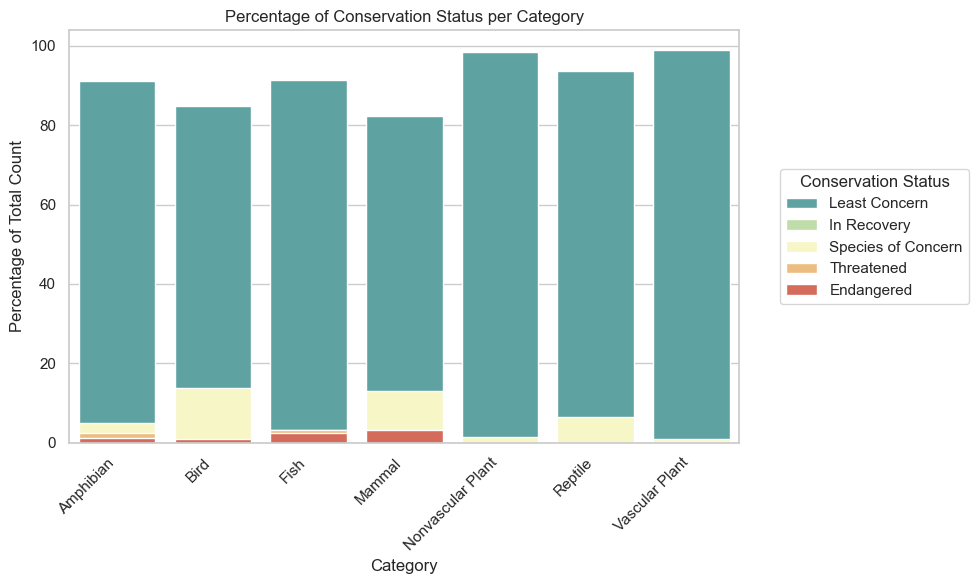

In [77]:
# Define the order of categories
conservation_order = [
    "Least Concern",
    "In Recovery",
    "Species of Concern",
    "Threatened",
    "Endangered",
]

# Create a custom color palette of 5 colors
spectral_palette = sns.color_palette("Spectral_r", 5)

# Zip the lists and create a dictionary to define a new color palette
custom_palette = dict(zip(conservation_order, spectral_palette))


# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Use sns.barplot with hue to differentiate conservation status and stack the bars
sns.barplot(
    data=count_conservation_status,
    x="category",
    y="percentage",
    hue="conservation_status",
    palette=custom_palette,
    hue_order=conservation_order,
    dodge=False,
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel("Category")
plt.ylabel("Percentage of Total Count")
plt.title("Percentage of Conservation Status per Category")

# Show the legend outside to the right
plt.legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


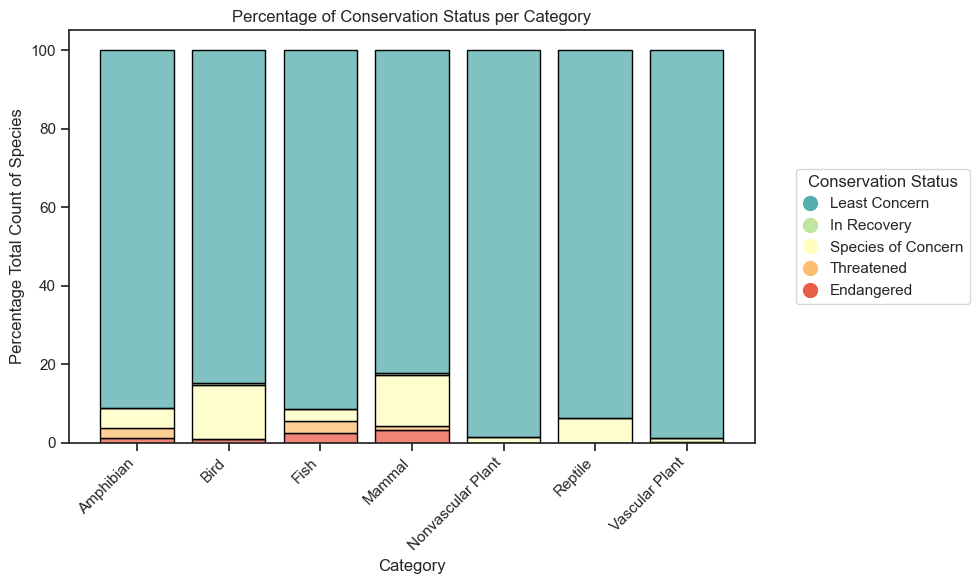

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of categories
conservation_order = [
    "Least Concern",
    "In Recovery",
    "Species of Concern",
    "Threatened",
    "Endangered",
]

# Create a custom color palette of 5 colors
spectral_palette = sns.color_palette("Spectral_r", 5)

# Zip the lists and create a dictionary to define a new color palette
custom_palette = dict(zip(conservation_order, spectral_palette))

# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))

# Set the style to have only horizontal grid lines
sns.set_style("ticks", {"ytick.major.size": 10})  # Adjust ytick.major.size as needed

sns.histplot(
    count_conservation_status,
    x="category",
    hue="conservation_status",
    hue_order=conservation_order,
    weights="percentage",
    multiple="stack",
    shrink=0.8,
    palette=custom_palette,
    edgecolor="black",
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel("Category")
plt.ylabel("Percentage Total Count of Species")
plt.title("Percentage of Conservation Status per Category")

# Create a legend with colored dots
legend_handles = [
    plt.Line2D(
        [],
        [],
        marker="o",
        color=custom_palette[status],
        markersize=10,
        linestyle="None",
    )
    for status in conservation_order
]
plt.legend(
    legend_handles,
    conservation_order,
    title="Conservation Status",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    handlelength=1,
)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [79]:
# Create a new data frame without the 'Least Concern' conservation status
species_no_lc = species[species["conservation_status"] != "Least Concern"]

# Define the order of categories
conservation_order_no_lc = [
    "In Recovery",
    "Species of Concern",
    "Threatened",
    "Endangered",
]

# Grouping by category, conservation status, and aggregating by count of species
count_conservation_status_no_lc = (
    species_no_lc.groupby(["category", "conservation_status"])
    .agg(scientific_name_count=("scientific_name", "count"))
    .reset_index()
)

# Calculate the total count for each category (excluding 'Least Concern')
total_counts_no_lc = count_conservation_status_no_lc.groupby("category")[
    "scientific_name_count"
].transform("sum")

# Calculate the percentage for each conservation status within each category
count_conservation_status_no_lc["percentage"] = (
    count_conservation_status_no_lc["scientific_name_count"] / total_counts_no_lc
) * 100
count_conservation_status_no_lc

,category,conservation_status,scientific_name_count,percentage
0,Amphibian,Endangered,1,14.285714
1,Amphibian,Species of Concern,4,57.142857
2,Amphibian,Threatened,2,28.571429
3,Bird,Endangered,4,5.063291
4,Bird,In Recovery,3,3.797468
5,Bird,Species of Concern,72,91.139241
6,Fish,Endangered,3,27.272727
7,Fish,Species of Concern,4,36.363636
8,Fish,Threatened,4,36.363636
9,Mammal,Endangered,7,18.421053


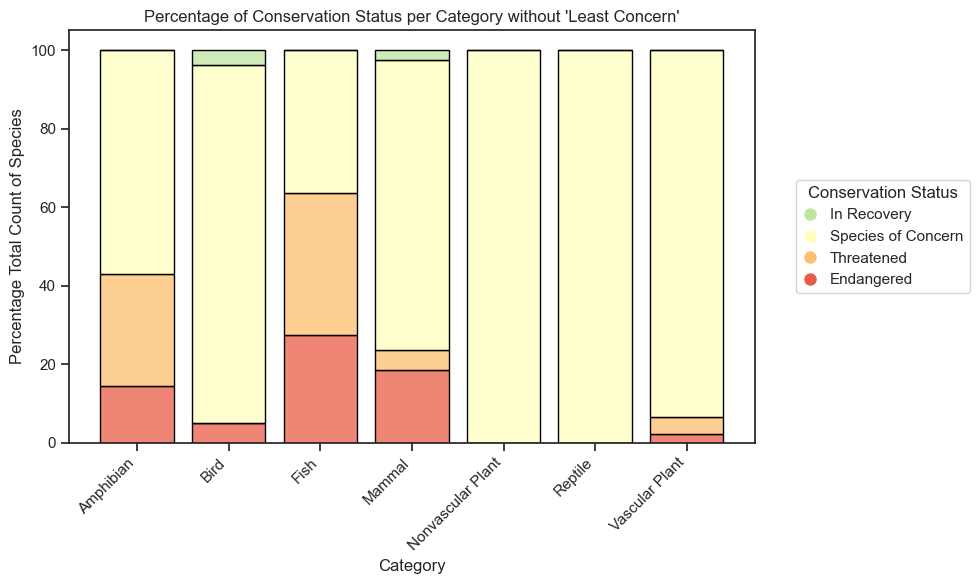

In [151]:
# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))

# Set the style to have only horizontal grid lines
sns.set_style("ticks", {"ytick.major.size": 10})  # Adjust ytick.major.size as needed

# Create a new status conservation list without 'Least Concern'
conservation_order_no_lc = conservation_order[1:]

sns.histplot(
    count_conservation_status_no_lc,
    x="category",
    hue="conservation_status",
    hue_order=conservation_order_no_lc,
    weights="percentage",
    multiple="stack",
    shrink=0.8,
    palette=custom_palette,
    edgecolor="black",
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel("Category")
plt.ylabel("Percentage Total Count of Species")
plt.title("Percentage of Conservation Status per Category without 'Least Concern'")

# Create a legend with custom colors
legend_handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markersize=10,
        markerfacecolor=custom_palette[status],
        label=status,
    )
    for status in conservation_order_no_lc
]

# Create a legend
plt.legend(
    handles=legend_handles,
    title="Conservation Status",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
    handlelength=1,
)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [ ]:


# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Use sns.barplot with hue to differentiate conservation status and stack the bars
sns.barplot(
    data=count_conservation_status,
    x="category",
    y="percentage",
    hue="conservation_status",
    palette=custom_palette,
    hue_order=conservation_order_no_lc,
    dodge=False,
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel("Category")
plt.ylabel("Percentage of Total Count")
plt.title("Percentage of Conservation Status per Category without 'Least Concern'")

# Show the legend outside to the right
plt.legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#### Count of conservation statuses per category
Let's plot the amount of threatened species by category with bar plots.

In [81]:
# # Create a FacetGrid for each category
# g = sns.FacetGrid(
#     species,
#     col="category",
#     hue="conservation_status",
#     hue_order=conservation_order,
#     col_wrap=3,
#     height=4,
#     sharey=False,
#     palette="Spectral_r",
# )
# g.map(
#     sns.countplot,
#     "conservation_status",
# )

# # Set labels and title
# g.set_axis_labels("Category", "Count of Species")
# g.set_titles(col_template="{col_name}")
# plt.suptitle("Count of Species per Conservation Status per Category", y=1.02)

# # Add legend manually if needed
# g.add_legend(
#     title="Conservation Status",
#     bbox_to_anchor=(1.05, 0.5),
#     loc="center left",
#     label_order=conservation_order,
# )

# for ax in g.axes.flat:
#     ax.set_xticks(range(len(conservation_order)))
#     ax.set_xticklabels(conservation_order, rotation=45, ha="right")

# # Add lines between bars
# for ax in g.axes.flat:
#     ax.grid(axis="y", linestyle="--", alpha=0.7)

# # Increase space between rows
# plt.tight_layout()

# # Show the plots
# plt.show()

The Least Concern category is quite numerous. Let's ignore it so we can focus on the other Conservation Status and their differences.

In [82]:
# # Recreate the bar plot without the 'Least Concern' category and using Seaborn's Facet Grid

# # Create a new list for the bar and hue order without 'Least Concern'
# conservation_order = [
#     "Species of Concern",
#     "Threatened",
#     "Endangered",
#     "In Recovery",
# ]

# custom_palette = {
#     "Species of Concern": "tab:orange",
#     "Threatened": "tab:pink",
#     "Endangered": "tab:blue",
#     "In Recovery": "tab:green",
# }


# # Create a new data frame without the 'Least Concern' conservation status
# species = species[(species["conservation_status"] != "Least Concern")]

# # Create a FacetGrid for each category
# g = sns.FacetGrid(
#     species,
#     col="category",
#     hue="conservation_status",
#     col_wrap=3,
#     height=4,
#     sharey=False,
#     palette="Set2",
# )
# g.map(
#     sns.countplot,
#     "conservation_status",
#     order=conservation_order,
#     hue_order=conservation_order,
# )

# # Set labels and title
# g.set_axis_labels("Category", "Count of Species")
# g.set_titles(col_template="{col_name}")
# plt.suptitle(
#     "Count of Species per Conservation Status per Category without 'Least Concern' Species",
#     y=1.02,
# )
# # Add legend manually if needed
# g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left", label_order=conservation_order)

# # Set the x_ticks and labels
# for ax in g.axes.flat:
#     ax.set_xticks(range(len(conservation_order)))
#     ax.set_xticklabels(conservation_order, rotation=45, ha="right")

# # Add lines between bars
# for ax in g.axes.flat:
#     ax.grid(axis="y", linestyle="--", alpha=0.7)

# # Increase space between rows
# plt.tight_layout()

# # Show the plots
# plt.show()

We got a sense of what is the distribution of conservation species across classes of living beings.
Now, lets compare the proportion of "At risk" and "Secure" conservation status.
- Secure
1. Least Concern
2. In recovery
- At risk
1. Species of Concern
2. Threatened
3. Endangered

In [95]:
# Map conservation statuses to new categories
status_mapping = {
    "Least Concern": "Secure",
    "In recovery": "Secure",
    "Species of Concern": "At risk",
    "Threatened": "At risk",
    "Endangered": "At risk",
}

# Create a new column called 'risk_assessment' and apply a mapping
species["risk_assessment"] = species["conservation_status"].map(status_mapping)

# Create a new data frame that reflects the count of species at risk per category
category_risk = (
    species.groupby(["category", "risk_assessment"])
    .agg(count=("risk_assessment", "count"))
    .reset_index()
)

# Calculate the total count for each category
total_count_per_category = category_risk.groupby("category")["count"].transform("sum")

# Create a new column with the percentage
category_risk["percentage"] = (category_risk["count"] / total_count_per_category) * 100

category_risk


,category,risk_assessment,count,percentage
0,Amphibian,At risk,7,8.750000
1,Amphibian,Secure,73,91.250000
2,Bird,At risk,76,14.671815
3,Bird,Secure,442,85.328185
4,Fish,At risk,11,8.661417
5,Fish,Secure,116,91.338583
6,Mammal,At risk,37,17.370892
7,Mammal,Secure,176,82.629108
8,Nonvascular Plant,At risk,5,1.501502
9,Nonvascular Plant,Secure,328,98.498498


Let's try to make a grouped bar that shows all of the conservation statuses per category.

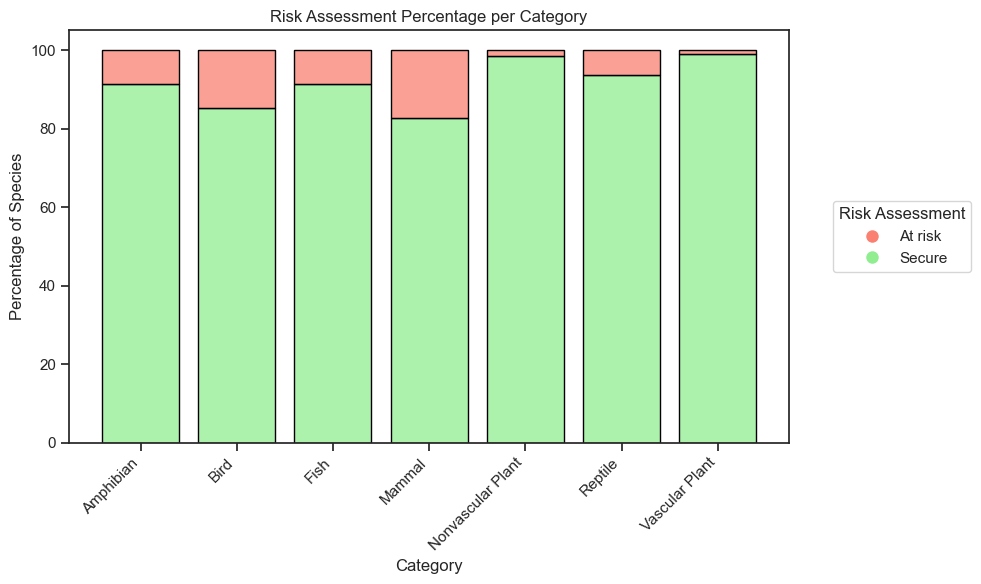

In [152]:
# Get the unique values of "risk_assessment"
risk_values = category_risk["risk_assessment"].unique()

# Define custom colors for legend labels with lower saturation
custom_colors = {"At risk": "salmon", "Secure": "lightgreen"}

# Use Seaborn's barplot for visualization
plt.figure(figsize=(10, 6))

# Set the style to have only horizontal grid lines
sns.set_style("ticks", {"ytick.major.size": 10})  # Adjust ytick.major.size as needed

sns.histplot(
    category_risk,
    x="category",
    hue="risk_assessment",
    weights="percentage",
    multiple="stack",
    shrink=0.8,
    edgecolor="black",
    palette=custom_colors.values(),
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Add labels and title if needed
plt.xlabel("Category")
plt.ylabel("Percentage of Species")
plt.title("Risk Assessment Percentage per Category")

# Create a legend with custom colors
legend_handles = [
    plt.Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markersize=10,
        markerfacecolor=color,
        label=label,
    )
    for label, color in custom_colors.items()
]
plt.legend(
    handles=legend_handles,
    title="Risk Assessment",
    bbox_to_anchor=(1.05, 0.5),
    loc="center left",
)

# Show the plot
plt.tight_layout()
plt.show()


The bar for Vascular Plants' Least Concern species is too numerous and eclipses the other data. Lets show the data in percentages of the total of rows per category.

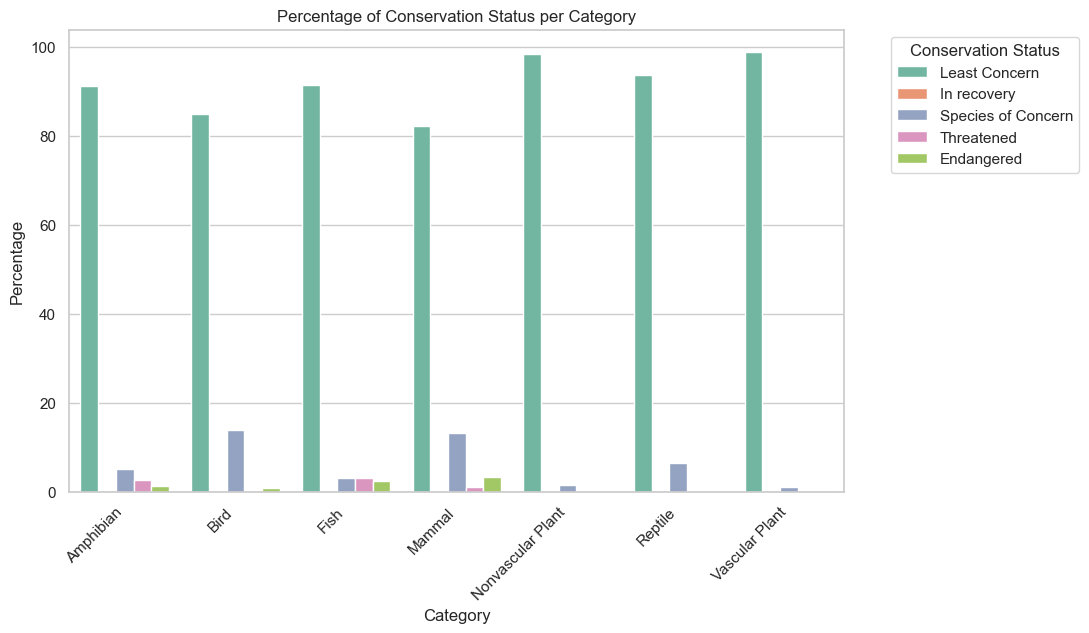

In [85]:
# # Get the unique conservation statuses and define the desired order
# unique_statuses = species['conservation_status'].unique()
# order = ['Least Concern', 'In recovery', 'Species of Concern', 'Threatened', 'Endangered']


# # Calculate the percentage of each conservation status per category
# percentage_df = species.groupby(['category', 'conservation_status']).size() / species.groupby('category').size() * 100
# percentage_df = percentage_df.reset_index(name='percentage')

# # Plotting with Seaborn using the specified order
# plt.figure(figsize=(10, 6))
# sns.set(style="whitegrid")
# sns.barplot(x="category", y="percentage", hue="conservation_status", data=percentage_df, palette="Set2", hue_order=order)

# # Set labels and title
# plt.xlabel('Category')
# plt.ylabel('Percentage')
# plt.title('Percentage of Conservation Status per Category')

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha="right")

# # Add legend
# plt.legend(title='Conservation Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Save the figure
# #plt.savefig('output_plots/Percentage_conservation_status_per_category.png')

# # Show the plot
# plt.show()

### Statistics Analysis
#### Chi2 test for Conservation Status per Category
This test is designed to check if there is a significant difference in the risk assessment distribution per category. In other words, it gives an answer if one of the categories, for example, "birds", has a higher proportion of species being at risk than the rest.

In [86]:
# Create a contingency table for the chi-square test
contingency_table = category_risk.pivot(index='category', columns='risk_assessment', values='count').fillna(0)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("The difference in counts between 'at risk' and 'secure' is statistically significant.")
else:
    print("The difference in counts between 'at risk' and 'secure' is not statistically significant.")


Chi-square statistic: 450.172367415504
P-value: 4.5064962077974853e-94
The difference in counts between 'at risk' and 'secure' is statistically significant.


##### Chi-square result
According to this test, the difference in counts between 'at risk' and 'secure' is statistically significant

In [87]:
import pandas as pd
from scipy.stats import chi2_contingency
from itertools import combinations

# Assuming category_risk is your original DataFrame

# Create a contingency table for each category
categories = category_risk["category"].unique()

# Create an empty list to store chi-squared results
chi2_result = pd.DataFrame(
    columns=["Category_1", "Category_2", "Chi2", "P-value", "Significant"]
)

# Set the alpha for statistical analysis
alpha = 0.05

# Perform paired chi-squared tests:
for first, second in combinations(categories, 2):
    # Filter data for the two categories
    category_data = category_risk[
        (category_risk["category"] == first)
        | (category_risk["category"] == second)
    ]

    # Extract the relevant columns
    index = category_data["category"]
    columns = category_data["risk_assessment"]
    values = category_data["count"]

    # Create a contingency table
    contingency_table = pd.crosstab(
        index=index, columns=columns, values=values, aggfunc="sum"
    )

    # Perform the chi-squared test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Check if the result is statistically significant
    is_significant = p < alpha

    # Append results to the significant_results DataFrame
    new_result = [first, second, chi2, p, is_significant]
    chi2_result.loc[len(chi2_result)] = new_result

chi2_result


,Category_1,Category_2,Chi2,P-value,Significant
0,Amphibian,Bird,1.567800,2.105268e-01,False
1,Amphibian,Fish,0.000000,1.000000e+00,False
2,Amphibian,Mammal,2.744969,9.756100e-02,False
3,Amphibian,Nonvascular Plant,9.581127,1.965877e-03,True
4,Amphibian,Reptile,0.077047,7.813397e-01,False
5,Amphibian,Vascular Plant,34.265490,4.808330e-09,True
6,Bird,Fish,2.663452,1.026777e-01,False
7,Bird,Mammal,0.647521,4.210005e-01,False
8,Bird,Nonvascular Plant,39.309487,3.616798e-10,True
9,Bird,Reptile,3.387960,6.567416e-02,False


#### Paired Chi-squared test results
The results of the paired chi-squared tests indicate whether there are significant differences in the distribution of risk assessments between different categories. Let's break down the interpretation based on the columns:

1. **Category_1 and Category_2**: These columns represent the pairs of categories for which the chi-squared tests were conducted.

2. **Chi2 (Chi-squared statistic)**: This value measures the difference between the expected and observed frequencies in the contingency table. Larger values indicate greater dissimilarity between the observed and expected distributions.

3. **P-value**: This is the probability of observing a chi-squared statistic as extreme as the one computed, assuming that the null hypothesis is true (i.e., there is no significant difference between the categories). A small p-value (typically < 0.05) suggests that you can reject the null hypothesis.

4. **Significant**: This column indicates whether the test is statistically significant based on the chosen significance level (alpha = 0.05). If True, it suggests that there is a significant difference in risk assessments between the categories.

Now, let's interpret some examples from your results:

- Row 3 (Amphibian vs. Mammal): The p-value is 0.097561, which is greater than 0.05. Therefore, you would not reject the null hypothesis, suggesting no significant difference in risk assessments between Amphibians and Mammals.

- Row 11 (Fish vs. Mammal): The p-value is 0.038445, which is less than 0.05. In this case, you would reject the null hypothesis, indicating a significant difference in risk assessments between Fish and Mammals.

- Row 16 (Mammal vs. Reptile): The p-value is 0.027744, which is less than 0.05. You would reject the null hypothesis, suggesting a significant difference in risk assessments between Mammals and Reptiles.

- Row 20 (Nonvascular Plant vs. Vascular Plant): The p-value is 0.593134, which is greater than 0.05. No significant difference is found between Nonvascular Plants and Vascular Plants in terms of risk assessments.

In summary, you can use the p-value to determine whether the differences in risk assessments between the categories are statistically significant. If the p-value is less than your chosen significance level (alpha), you would reject the null hypothesis and conclude that there is a significant difference. Otherwise, you would fail to reject the null hypothesis.

### Species and Observations Table Join

In [88]:
species_observations = pd.merge(species, observations, on="scientific_name", how='inner')
species_observations

,category,scientific_name,common_names,conservation_status,risk_assessment,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern,Secure,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Least Concern,Secure,Yosemite National Park,128
...,...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Least Concern,Secure,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Least Concern,Secure,Bryce National Park,111


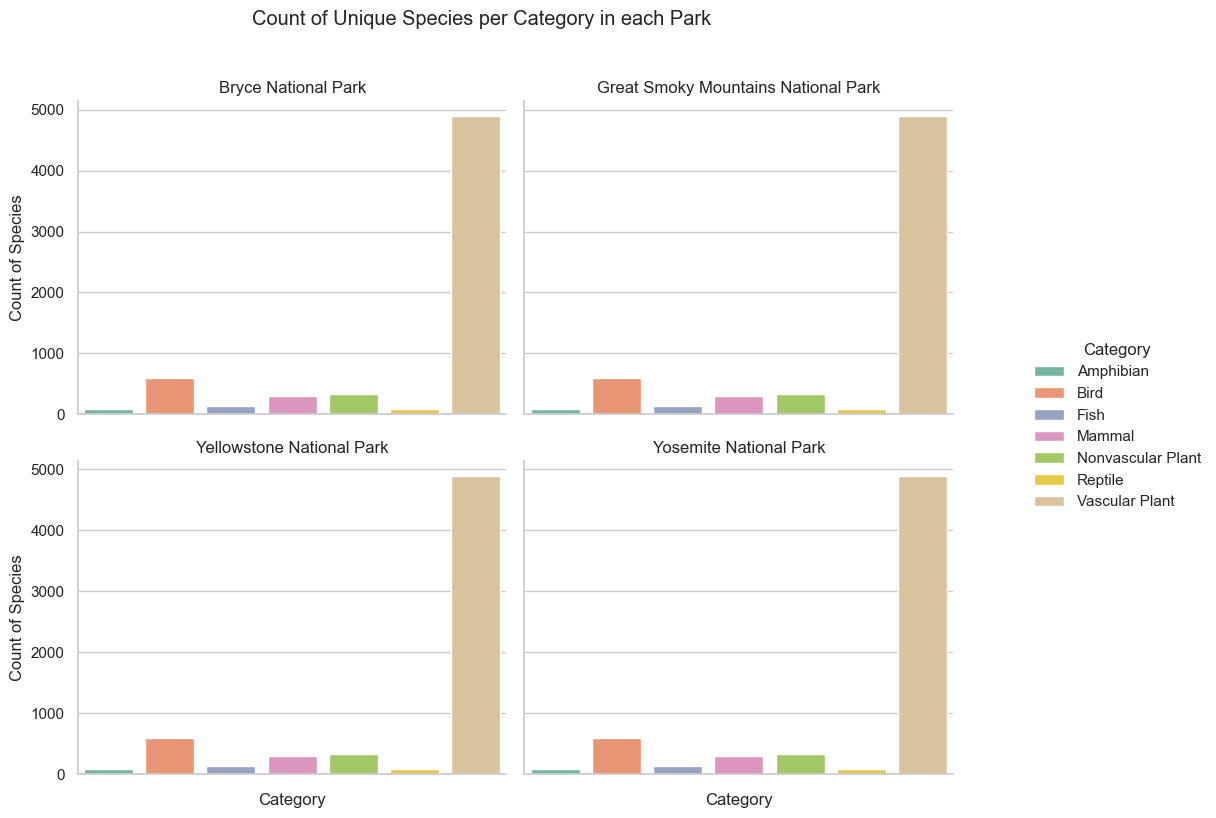

In [89]:
# Group data per park_name, category and aggregate the count of species
category_count_per_park = species_observations.groupby(['park_name', 'category']).agg(scientific_name_count=('scientific_name', 'count')).reset_index()

# Create a FacetGrid
g = sns.FacetGrid(
    category_count_per_park,
    col='park_name',
    hue='category',
    col_wrap=2,
    height=4,
    palette='Set2',
)
# Create a barplot in each of the tiles of the grid
g.map_dataframe(sns.barplot, x='category', y='scientific_name_count')

# Set labels and title
g.set_axis_labels("Category", "Count of Species")
g.set_titles(col_template="{col_name}")
plt.suptitle("Count of Unique Species per Category in each Park", y=1.02)

# Add legend manually if needed
g.add_legend(title="Category", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

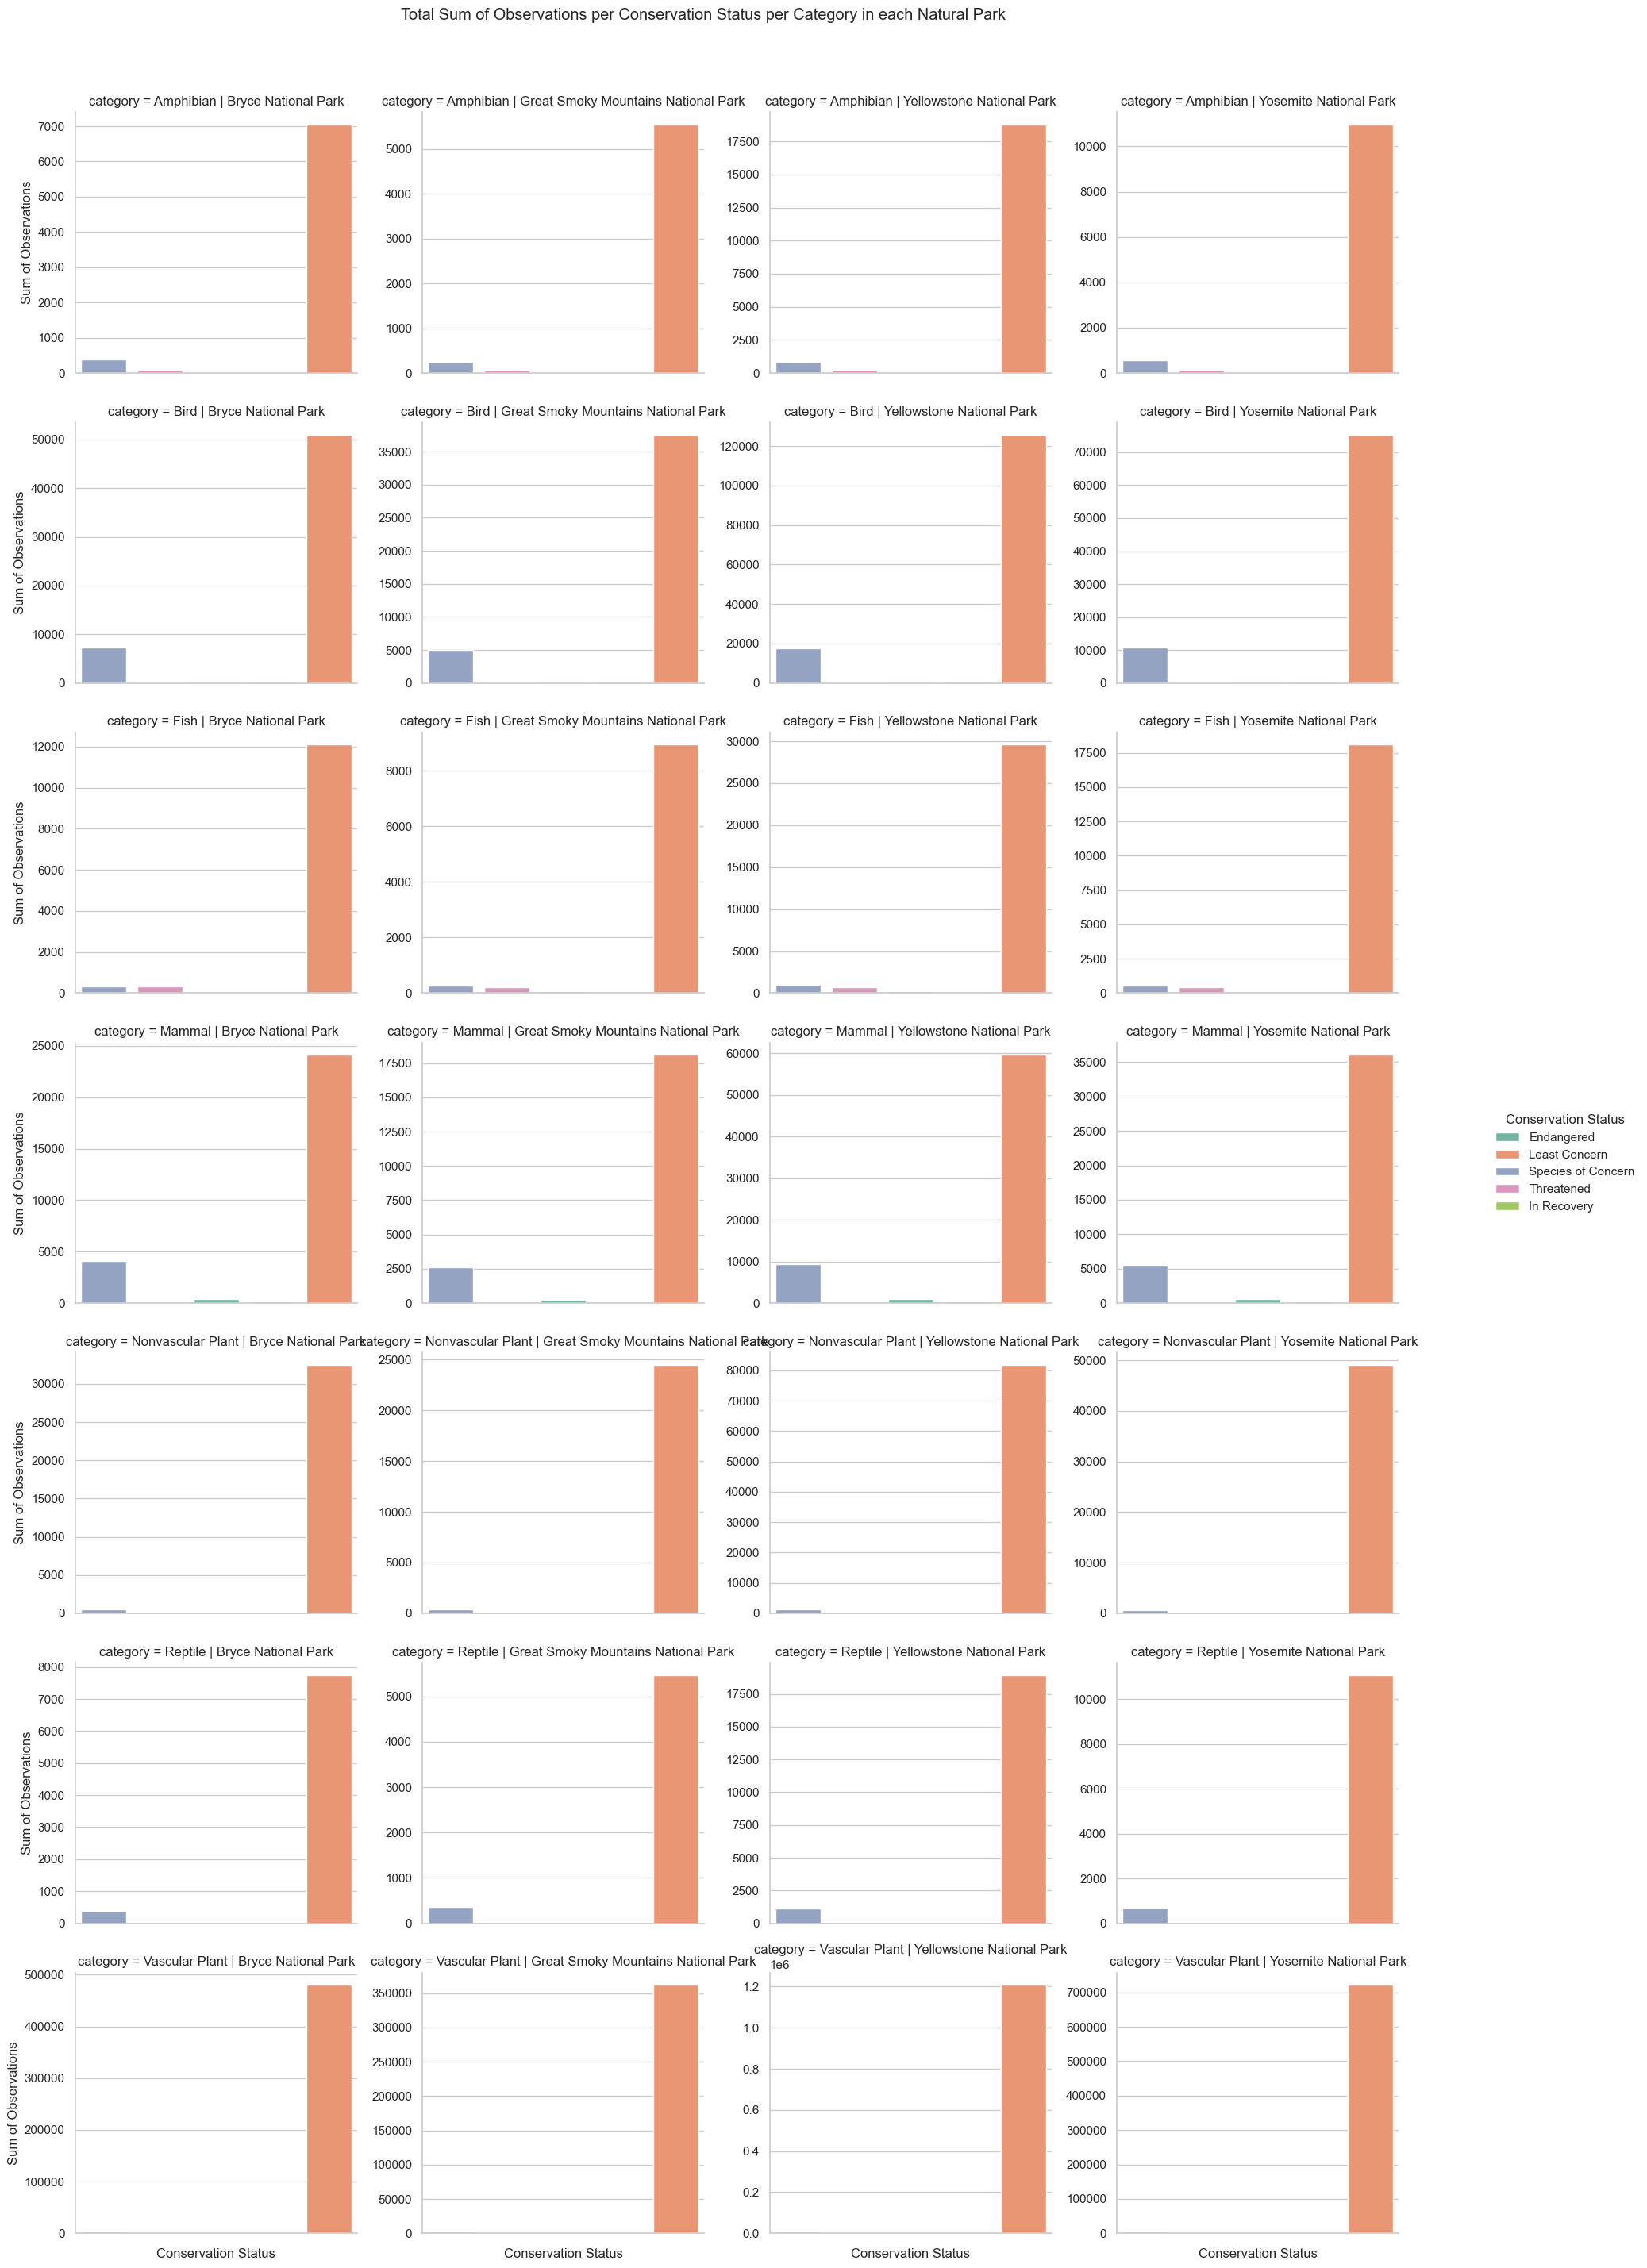

In [90]:
# Create a new list for the bar and hue order
conservation_order = [
    "Species of Concern",
    "Threatened",
    "Endangered",
    "In Recovery",
    "Least Concern"
]

# Create a DataFrame that groups data per park_name, category and conservation_status, while aggregating the data to show the sum of observations per row
observations_per_category_per_park = (
    species_observations.groupby(["park_name", "category", "conservation_status"])
    .agg(observations_sum=("observations", "sum"))
    .reset_index()
)

# Create a FacetGrid to show all of the data of the DataFrame
g = sns.FacetGrid(
    data=observations_per_category_per_park,
    col="park_name",
    row="category",
    hue="conservation_status",
    height=4,
    palette="Set2",
    sharey=False
)
# Create a barplot in each one of the tiles of the grid
g.map_dataframe(sns.barplot, x="conservation_status", y="observations_sum", order=conservation_order)

# Set labels and title
g.set_axis_labels("Conservation Status", "Sum of Observations")
g.set_titles(col_template="{col_name}")
plt.suptitle(
    "Total Sum of Observations per Conservation Status per Category in each Natural Park",
    y=1.02,
)

# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left")

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()

Filtering out the 'Least Concern' conservation status again to show the other data better.

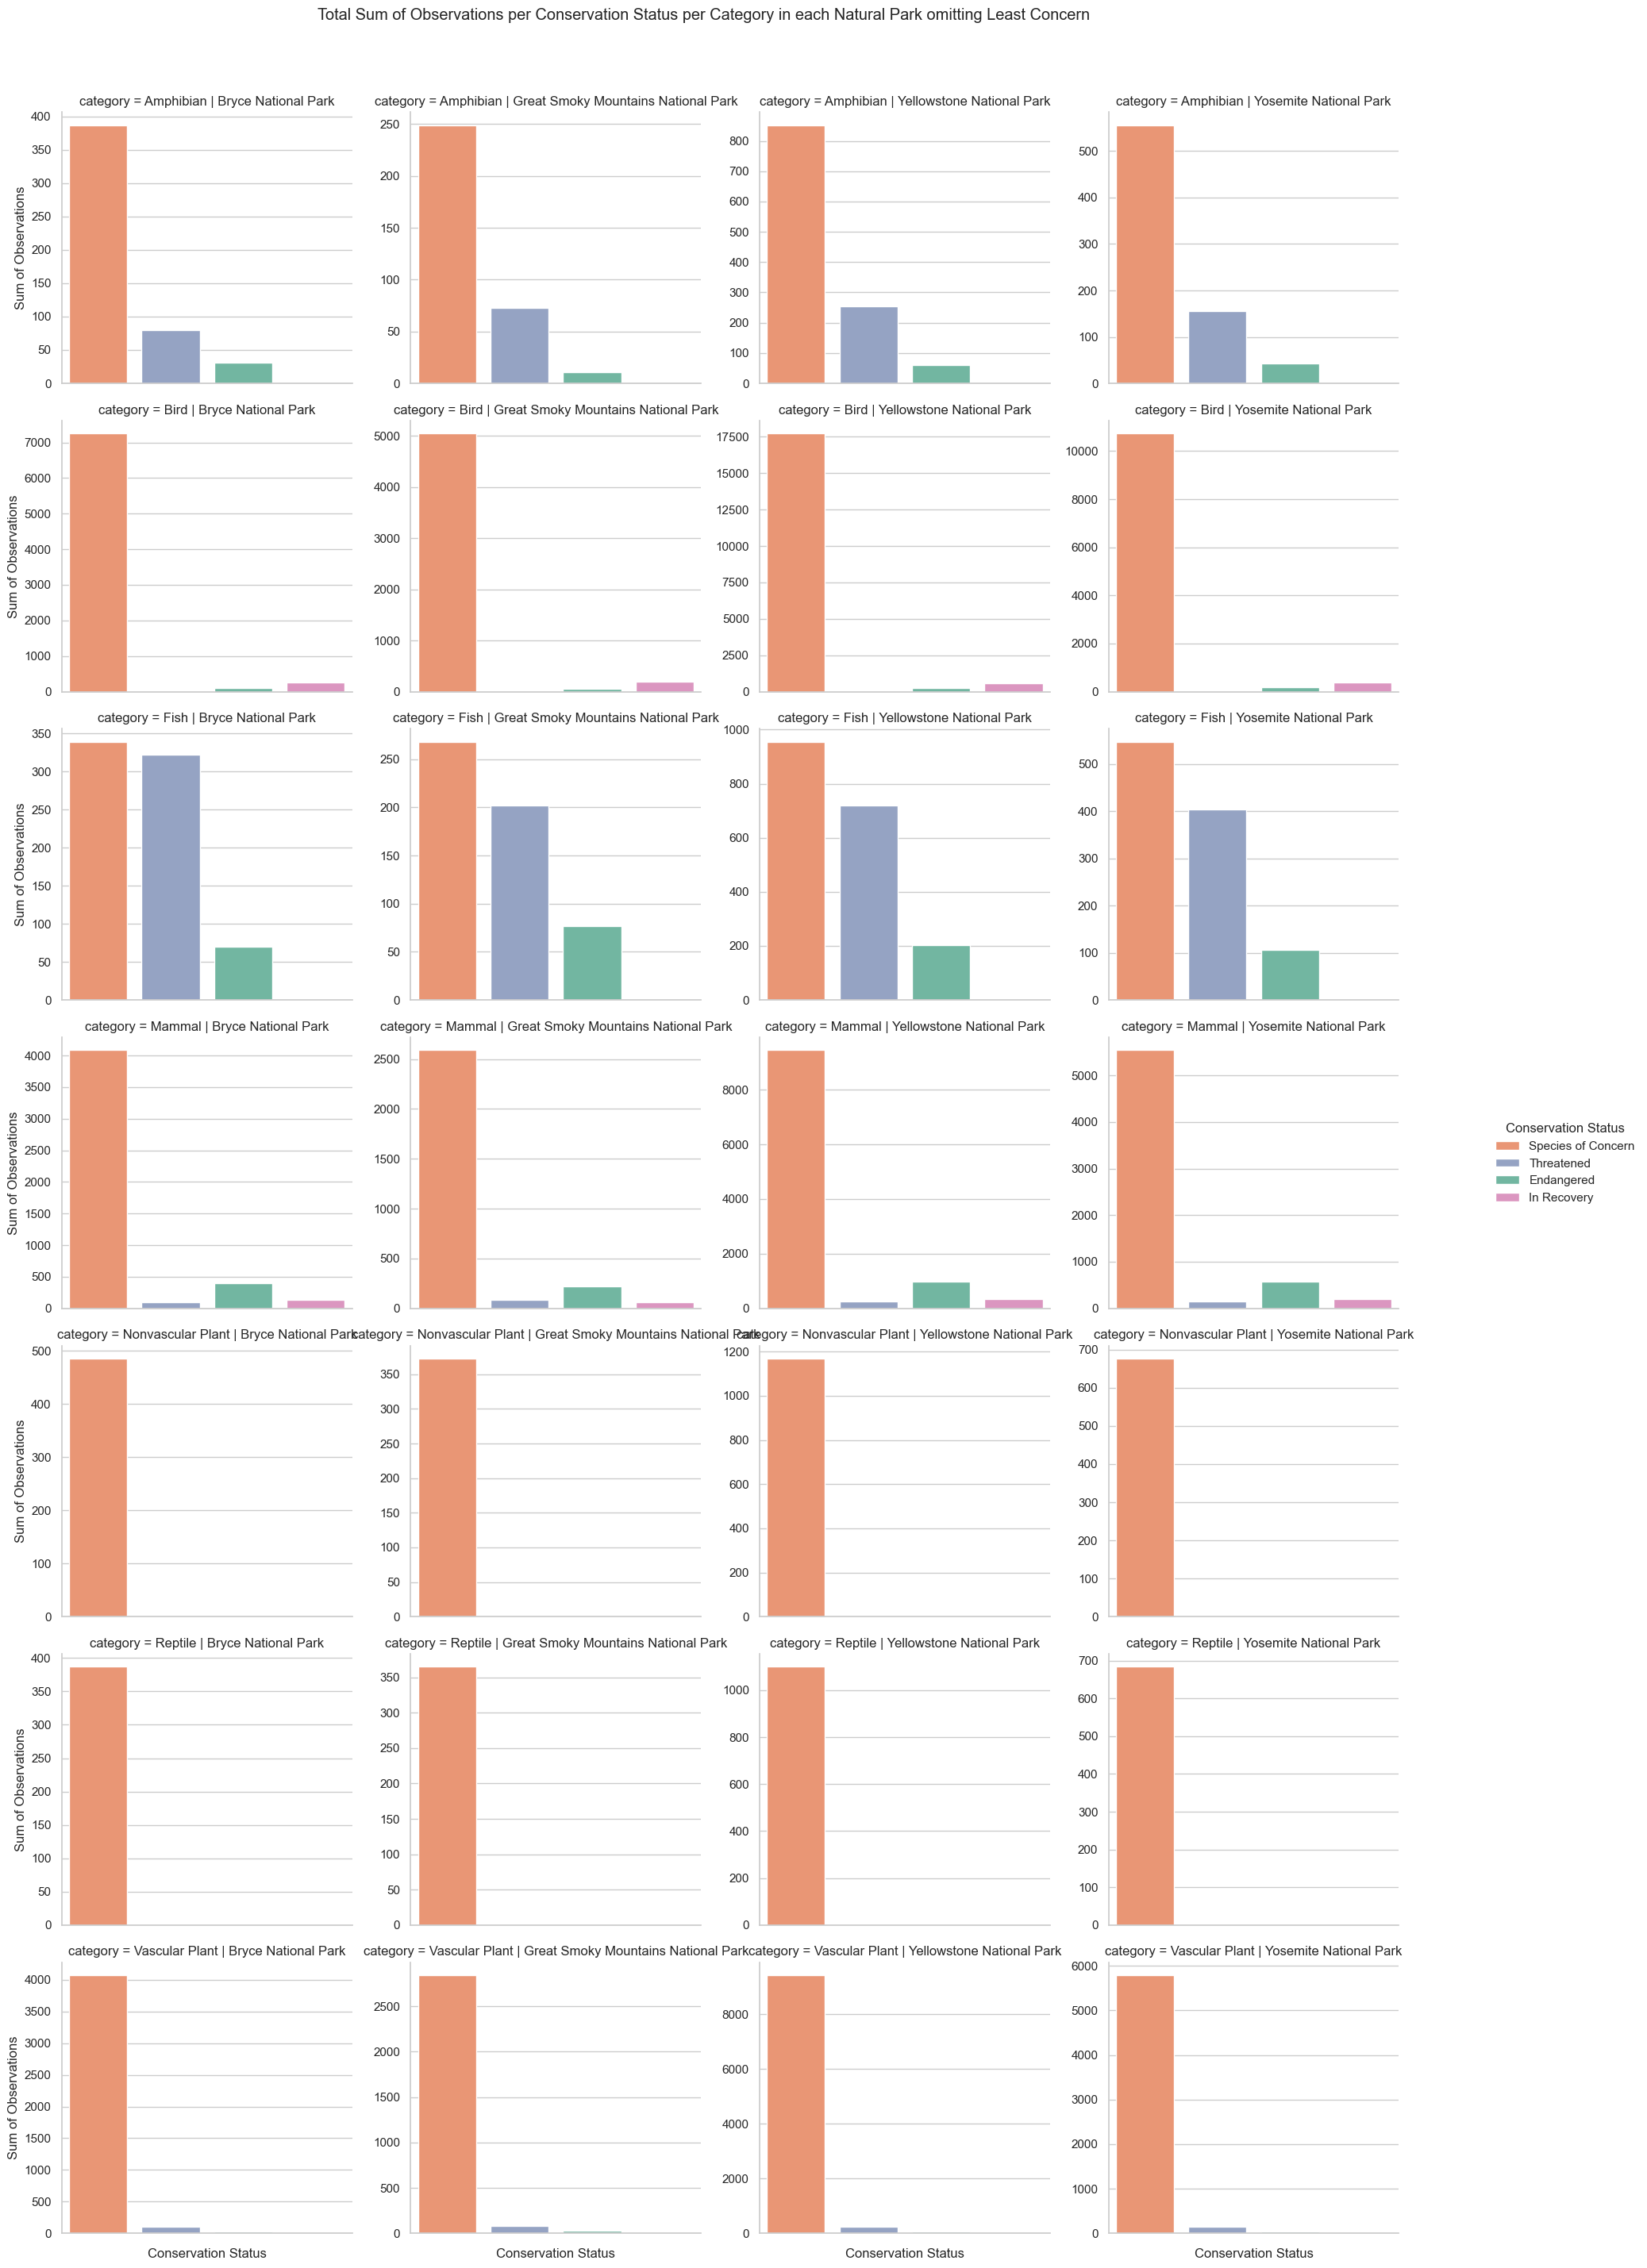

In [91]:
# Create a new list for the bar and hue order omitting the Least Concern value
conservation_order = [
    "Species of Concern",
    "Threatened",
    "Endangered",
    "In Recovery",
]

# Filter out rows with 'Least Concern' conservation_status
observations_per_category_per_park_filtered = observations_per_category_per_park[
    observations_per_category_per_park["conservation_status"] != "Least Concern"
]

# Create a FacetGrid to show all of the data of the DataFrame
g = sns.FacetGrid(
    data=observations_per_category_per_park_filtered,
    col="park_name",
    row="category",
    hue="conservation_status",
    height=4,
    palette="Set2",
    sharey=False
)
# Create a barplot in each one of the tiles of the grid
g.map_dataframe(sns.barplot, x="conservation_status", y="observations_sum", order=conservation_order)

# Set labels and title
g.set_axis_labels("Conservation Status", "Sum of Observations")
g.set_titles(col_template="{col_name}")
plt.suptitle(
    "Total Sum of Observations per Conservation Status per Category in each Natural Park omitting Least Concern",
    y=1.02,
)

# Add legend manually if needed
g.add_legend(title="Conservation Status", bbox_to_anchor=(1.05, 0.5), loc="center left", label_order=conservation_order)

# Set explicit ticks and rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Increase space between rows
plt.tight_layout()

# Show the plots
plt.show()
